In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
from sklearn.metrics import confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
import scipy.sparse

In [24]:
df_fake_train = pd.read_csv('data\\Fake_training.csv')
df_real_train = pd.read_csv('data\\True_training.csv')
df_fake_test = pd.read_csv('data\\Fake_testing.csv')
df_real_test = pd.read_csv('data\\True_testing.csv')

df_real_test.head(10)

,title,text,subject,date
0,Sean Hannity Just Said Child Molestation Is O...,Republicans for some reason think it s perfect...,News,"November 9, 2017"
1,Boiler Room EP #69 – CULTure Club,Tune in to the Alternate Current Radio Network...,Middle-east,"August 18, 2016"
2,Chris Christie Takes Marco Rubio To The Woods...,Marco Rubio was looming large in New Hampshire...,News,"February 7, 2016"
3,FIVE FACTS About Benghazi That Hillary Doesn’t...,FIVE FACTS ABOUT HILLARY AND BENGHAZI:,Government News,"Jul 29, 2016"
4,Stuck on Stupid: Why is America Starting WW3?,SARTRE 21st Century WireEvery day the world mo...,US_News,"October 11, 2016"
5,LOL! CONSERVATIVE COMEDIAN Steven Crowder Make...,"Hysterical! As always, conservative comedian S...",left-news,"Jun 18, 2016"
6,ANOTHER WIN FOR TRUMP! Release Of Americans Ja...,Another great move by the Trump administration...,Government News,"Apr 21, 2017"
7,FAKE CNN and MSNBC Caught Claiming “LIVE” Gues...,,politics,"Mar 23, 2017"
8,HILLARY CLINTON: We All Know She’s Deceitful A...,"She was an unethical, dishonest lawyer. She c...",politics,"Apr 15, 2015"
9,BREAKING: LIVE WIKILEAKS Announcement About Hi...,People have a right to understand who it is t...,left-news,"Oct 4, 2016"


In [25]:
df_real_train["text"] = df_real_train["text"].replace(r"\(Reuters\)\s*", "", regex=True)
df_real_test["text"] = df_real_test["text"].replace(r"\(Reuters\)\s*", "", regex=True)
df_real_train.head()

,title,text,subject,date
0,Europe rights watchdog says Turkey's emergency...,BRUSSELS - A leading European rights watchdog ...,worldnews,"October 6, 2017"
1,Exclusive: Trump targets illegal immigrants wh...,"- In September 2014, Gilberto Velasquez, a 38-...",politicsNews,"June 9, 2017"
2,"At G20 summit, Trump pledges $639 million in a...",HAMBURG - U.S. President Donald Trump on Satur...,politicsNews,"July 8, 2017"
3,Ex-Christie associates lose bid for new trial ...,NEW YORK - A federal judge rejected a request ...,politicsNews,"March 2, 2017"
4,Young blacks more open to Bernie Sanders' Whit...,"ORANGEBURG, S.C. - If Democratic hopeful Berni...",politicsNews,"February 12, 2016"


In [26]:
df_real_train['label'] = 1
df_fake_train['label'] = 0
df_fake_test['label'] = 0
df_real_test['label'] = 1

df_fake_test.head()

,title,text,subject,date,label
0,Sean Hannity Just Said Child Molestation Is O...,Republicans for some reason think it s perfect...,News,"November 9, 2017",0
1,Boiler Room EP #69 – CULTure Club,Tune in to the Alternate Current Radio Network...,Middle-east,"August 18, 2016",0
2,Chris Christie Takes Marco Rubio To The Woods...,Marco Rubio was looming large in New Hampshire...,News,"February 7, 2016",0
3,FIVE FACTS About Benghazi That Hillary Doesn’t...,FIVE FACTS ABOUT HILLARY AND BENGHAZI:,Government News,"Jul 29, 2016",0
4,Stuck on Stupid: Why is America Starting WW3?,SARTRE 21st Century WireEvery day the world mo...,US_News,"October 11, 2016",0


In [27]:
print(len(df_fake_train), len(df_real_train))

14088 12850


In [28]:
'''
df_fake_manual_testing = df_fake.tail(10)
for i in range(14087,14077,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
df_real_manual_testing = df_real.tail(10)
for i in range(12849, 12839, -1):
    df_real.drop([i], axis = 0, inplace = True)
'''

'\ndf_fake_manual_testing = df_fake.tail(10)\nfor i in range(14087,14077,-1):\n    df_fake.drop([i], axis = 0, inplace = True)\n    \ndf_real_manual_testing = df_real.tail(10)\nfor i in range(12849, 12839, -1):\n    df_real.drop([i], axis = 0, inplace = True)\n'

In [29]:
print(len(df_fake_test), len(df_real_test))

9393 8567


In [30]:
#df_fake_manual_testing.head()

In [31]:
#df_manual_testing = pd.concat([df_fake_manual_testing,df_real_manual_testing], axis = 0)
#df_manual_testing.to_csv("data\\manual_testing_new.csv")

In [32]:
df = pd.concat([df_real_train, df_fake_train], axis = 0)
df_test = pd.concat([df_real_test, df_fake_test], axis = 0)
df.head(10)

,title,text,subject,date,label
0,Europe rights watchdog says Turkey's emergency...,BRUSSELS - A leading European rights watchdog ...,worldnews,"October 6, 2017",1
1,Exclusive: Trump targets illegal immigrants wh...,"- In September 2014, Gilberto Velasquez, a 38-...",politicsNews,"June 9, 2017",1
2,"At G20 summit, Trump pledges $639 million in a...",HAMBURG - U.S. President Donald Trump on Satur...,politicsNews,"July 8, 2017",1
3,Ex-Christie associates lose bid for new trial ...,NEW YORK - A federal judge rejected a request ...,politicsNews,"March 2, 2017",1
4,Young blacks more open to Bernie Sanders' Whit...,"ORANGEBURG, S.C. - If Democratic hopeful Berni...",politicsNews,"February 12, 2016",1
5,New York attorney general says will sue over O...,- New York state Attorney General Eric Schneid...,politicsNews,"July 17, 2017",1
6,Indonesian parliament speaker quits amid graft...,JAKARTA - The speaker of Indonesia s parliamen...,worldnews,"December 11, 2017",1
7,Spanish lender Sabadell to transfer legal base...,MADRID - Spanish lender Sabadell decided on Th...,worldnews,"October 5, 2017",1
8,House speaker tells Trump healthcare bill lack...,WASHINGTON - U.S. House Speaker Paul Ryan told...,politicsNews,"March 24, 2017",1
9,Britain says expects most EU citizens can stay...,LONDON - The British government said on Tuesda...,worldnews,"November 7, 2017",1


In [33]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [34]:
df = df.drop(["title", "subject","date"], axis = 1)
df_test = df_test.drop(["title", "subject","date"], axis = 1)

In [35]:
df.isnull().sum()


text     0
label    0
dtype: int64

In [36]:
df_test.isnull().sum()

text     0
label    0
dtype: int64

In [37]:
df = df.sample(frac = 1)

In [38]:
df.head()

,text,label
5962,YANGON - One person was killed on Thursday in ...,1
1983,"Now that former reality television star, seria...",0
12517,Donald Trump has long had a contentious relati...,0
13851,Being a xenophobic bigot and a confirmed fasci...,0
8826,Acting FBI Director Andrew McCabe is being inv...,0


In [39]:
df.reset_index(inplace = True)


In [40]:
df.drop(["index"], axis = 1, inplace = True)
#df.drop(['level_0'], axis = 1, inplace = True)
df.head()

,text,label
0,YANGON - One person was killed on Thursday in ...,1
1,"Now that former reality television star, seria...",0
2,Donald Trump has long had a contentious relati...,0
3,Being a xenophobic bigot and a confirmed fasci...,0
4,Acting FBI Director Andrew McCabe is being inv...,0


In [41]:
df.columns

Index(['text', 'label'], dtype='object')

In [42]:
df.head()

,text,label
0,YANGON - One person was killed on Thursday in ...,1
1,"Now that former reality television star, seria...",0
2,Donald Trump has long had a contentious relati...,0
3,Being a xenophobic bigot and a confirmed fasci...,0
4,Acting FBI Director Andrew McCabe is being inv...,0


In [43]:
# Tiếp tục xử lý dữ liệu như bình thường
def wordopt(text):
    # Download stopwords nếu chưa có
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    
    # Lấy danh sách stopwords tiếng Anh
    stop_words = set(nltk.corpus.stopwords.words('english'))
    
    text = text.lower()  # Chuyển tất cả thành chữ thường
    text = re.sub(r'\[.*?\]', '', text)  # Loại bỏ văn bản trong dấu ngoặc vuông
    text = re.sub(r"\W", " ", text)  # Loại bỏ ký tự không phải chữ cái và số
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Loại bỏ liên kết URL
    text = re.sub(r'<.*?>', '', text)  # Loại bỏ các thẻ HTML
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Loại bỏ dấu câu
    text = re.sub(r'\n', '', text)  # Loại bỏ ký tự xuống dòng
    text = re.sub(r'\w*\d\w*', '', text)  # Loại bỏ từ có chứa số
    
    # Loại bỏ stopwords
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])
    
    return text


Thống kê ban đầu:
Số lượng tin thật: 12850
Số lượng tin giả: 14088


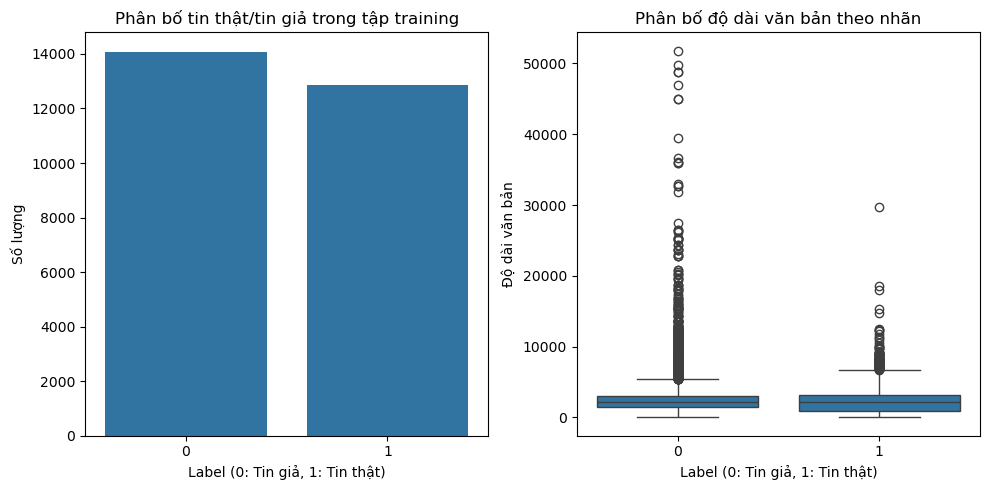


Thống kê độ dài văn bản cho tin thật:
count    12850.00000
mean      2376.56786
std       1692.24454
min          1.00000
25%        889.25000
50%       2214.00000
75%       3236.75000
max      29771.00000
Name: original_length, dtype: float64

Thống kê độ dài văn bản cho tin giả:
count    14088.000000
mean      2543.159781
std       2491.543303
min          1.000000
25%       1440.000000
50%       2169.000000
75%       3038.000000
max      51794.000000
Name: original_length, dtype: float64

Số tin giả có độ dài > 20000: 43
Số tin thật có độ dài > 20000: 1

Thống kê sau khi xử lý wordopt - Tập Training:
Số lượng tin thật: 12850
Số lượng tin giả: 14088

Thống kê độ dài văn bản sau wordopt cho tin thật (Training):
count    12850.000000
mean      1706.233230
std       1203.095552
min          0.000000
25%        640.000000
50%       1591.000000
75%       2310.750000
max      16995.000000
Name: processed_length, dtype: float64

Thống kê độ dài văn bản sau wordopt cho tin giả (Training):
c

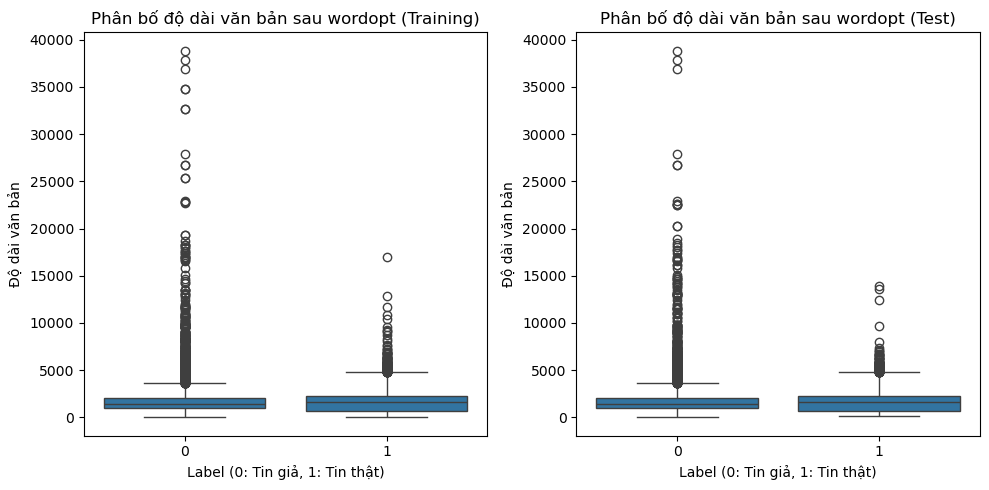


Thống kê độ dài văn bản sau wordopt cho tin thật (Test):
count     8567.000000
mean      1703.238123
std       1190.529841
min        109.000000
25%        667.500000
50%       1582.000000
75%       2313.500000
max      13913.000000
Name: processed_length, dtype: float64

Thống kê độ dài văn bản sau wordopt cho tin giả (Test):
count     9393.000000
mean      1727.506228
std       1817.052290
min          0.000000
25%        956.000000
50%       1447.000000
75%       2029.000000
max      38827.000000
Name: processed_length, dtype: float64


,text,label
0,yangon one person killed thursday massive fire...,1
1,former reality television star serial rapist a...,0
2,donald trump long contentious relationship pre...,0
3,xenophobic bigot confirmed fascist enough dona...,0
4,acting fbi director andrew mccabe investigated...,0


In [44]:
# Tính độ dài văn bản trước khi xử lý
df['original_length'] = df['text'].str.len()

# In thống kê về độ dài văn bản ban đầu
print("\nThống kê ban đầu:")
print("Số lượng tin thật:", len(df[df['label'] == 1]))
print("Số lượng tin giả:", len(df[df['label'] == 0]))

# 1. Phân tích phân bố dữ liệu
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='label')
plt.title('Phân bố tin thật/tin giả trong tập training')
plt.xlabel('Label (0: Tin giả, 1: Tin thật)')
plt.ylabel('Số lượng')

# 2. Phân tích độ dài văn bản
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='label', y='original_length')
plt.title('Phân bố độ dài văn bản theo nhãn')
plt.xlabel('Label (0: Tin giả, 1: Tin thật)')
plt.ylabel('Độ dài văn bản')
plt.tight_layout()
plt.show()

# In thống kê chi tiết về độ dài văn bản
print("\nThống kê độ dài văn bản cho tin thật:")
print(df[df['label'] == 1]['original_length'].describe())
print("\nThống kê độ dài văn bản cho tin giả:")
print(df[df['label'] == 0]['original_length'].describe())

# In số lượng tin có độ dài > 20000 (chỉ để tham khảo)
print("\nSố tin giả có độ dài > 20000:", len(df[(df['label'] == 0) & (df['original_length'] > 20000)]))
print("Số tin thật có độ dài > 20000:", len(df[(df['label'] == 1) & (df['original_length'] > 20000)]))

# Xóa cột original_length vì không cần nữa
df = df.drop('original_length', axis=1)

# Xử lý văn bản bằng hàm wordopt
df["text"] = df["text"].apply(wordopt)
df_test["text"] = df_test["text"].apply(wordopt)

# Thống kê độ dài sau khi xử lý wordopt
df['processed_length'] = df['text'].str.len()
df_test['processed_length'] = df_test['text'].str.len()

# Thống kê cho tập training
print("\nThống kê sau khi xử lý wordopt - Tập Training:")
print("Số lượng tin thật:", len(df[df['label'] == 1]))
print("Số lượng tin giả:", len(df[df['label'] == 0]))

# Vẽ biểu đồ phân bố độ dài sau khi xử lý cho tập training
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='label', y='processed_length')
plt.title('Phân bố độ dài văn bản sau wordopt (Training)')
plt.xlabel('Label (0: Tin giả, 1: Tin thật)')
plt.ylabel('Độ dài văn bản')

# Thống kê chi tiết cho tập training
print("\nThống kê độ dài văn bản sau wordopt cho tin thật (Training):")
print(df[df['label'] == 1]['processed_length'].describe())
print("\nThống kê độ dài văn bản sau wordopt cho tin giả (Training):")
print(df[df['label'] == 0]['processed_length'].describe())

# Thống kê cho tập test
print("\nThống kê sau khi xử lý wordopt - Tập Test:")
print("Số lượng tin thật:", len(df_test[df_test['label'] == 1]))
print("Số lượng tin giả:", len(df_test[df_test['label'] == 0]))

# Vẽ biểu đồ phân bố độ dài sau khi xử lý cho tập test
plt.subplot(1, 2, 2)
sns.boxplot(data=df_test, x='label', y='processed_length')
plt.title('Phân bố độ dài văn bản sau wordopt (Test)')
plt.xlabel('Label (0: Tin giả, 1: Tin thật)')
plt.ylabel('Độ dài văn bản')
plt.tight_layout()
plt.show()

# Thống kê chi tiết cho tập test
print("\nThống kê độ dài văn bản sau wordopt cho tin thật (Test):")
print(df_test[df_test['label'] == 1]['processed_length'].describe())
print("\nThống kê độ dài văn bản sau wordopt cho tin giả (Test):")
print(df_test[df_test['label'] == 0]['processed_length'].describe())

# Xóa cột processed_length vì không cần nữa
df = df.drop('processed_length', axis=1)
df_test = df_test.drop('processed_length', axis=1)

df.head()

In [45]:
x_train = df["text"]
y_train = df["label"]
x_test = df_test["text"]
y_test = df_test["label"]

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [47]:
# Trích xuất độ dài văn bản cho tập training và test
text_length_train = df['text'].apply(len)
text_length_test = df_test['text'].apply(len)

# Kết hợp feature độ dài với TF-IDF features
xv_train_with_length = scipy.sparse.hstack([
    xv_train,
    scipy.sparse.csr_matrix(text_length_train.values.reshape(-1, 1))
])

xv_test_with_length = scipy.sparse.hstack([
    xv_test,
    scipy.sparse.csr_matrix(text_length_test.values.reshape(-1, 1))
])

LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train_with_length, y_train)
pred_lr = LR.predict(xv_test_with_length)
print("\nLogistic Regression với feature độ dài:")
print("Accuracy:", LR.score(xv_test_with_length, y_test))
print(classification_report(y_test, pred_lr))


Logistic Regression với feature độ dài:
Accuracy: 0.9733853006681514
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9393
           1       0.97      0.98      0.97      8567

    accuracy                           0.97     17960
   macro avg       0.97      0.97      0.97     17960
weighted avg       0.97      0.97      0.97     17960



DECISION TREE CLASSIFICATION

In [50]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train_with_length, y_train)
pred_dt = DT.predict(xv_test_with_length)
print("\nDecision Tree với feature độ dài:")
print("Accuracy:", DT.score(xv_test_with_length, y_test))
print(classification_report(y_test, pred_dt))


Decision Tree với feature độ dài:
Accuracy: 0.9491648106904231
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9393
           1       0.96      0.94      0.95      8567

    accuracy                           0.95     17960
   macro avg       0.95      0.95      0.95     17960
weighted avg       0.95      0.95      0.95     17960



GRADIENT BOOSTING CLASSIFIER

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train_with_length, y_train)
pred_gbc = GBC.predict(xv_test_with_length)
print("\nGradient Boosting với feature độ dài:")
print("Accuracy:", GBC.score(xv_test_with_length, y_test))
print(classification_report(y_test, pred_gbc))


Gradient Boosting với feature độ dài:
Accuracy: 0.959576837416481
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9393
           1       0.96      0.96      0.96      8567

    accuracy                           0.96     17960
   macro avg       0.96      0.96      0.96     17960
weighted avg       0.96      0.96      0.96     17960



RANDOM FOREST CLASSIFIER

In [51]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train_with_length, y_train)
pred_rfc = RFC.predict(xv_test_with_length)
print("\nRandom Forest với feature độ dài:")
print("Accuracy:", RFC.score(xv_test_with_length, y_test))
print(classification_report(y_test, pred_rfc))


Random Forest với feature độ dài:
Accuracy: 0.9805679287305122
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9393
           1       0.98      0.98      0.98      8567

    accuracy                           0.98     17960
   macro avg       0.98      0.98      0.98     17960
weighted avg       0.98      0.98      0.98     17960

Accuracy: 0.9805679287305122
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9393
           1       0.98      0.98      0.98      8567

    accuracy                           0.98     17960
   macro avg       0.98      0.98      0.98     17960
weighted avg       0.98      0.98      0.98     17960



XGBOOST

In [52]:
from xgboost import XGBClassifier

XG = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, n_jobs=-1)
XG.fit(xv_train_with_length, y_train)
pred_xg = XG.predict(xv_test_with_length)
print("\nXGBoost với feature độ dài:")
print("Accuracy:", XG.score(xv_test_with_length, y_test))
print(classification_report(y_test, pred_xg))


XGBoost với feature độ dài:
Accuracy: 0.9602449888641426
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9393
           1       0.96      0.96      0.96      8567

    accuracy                           0.96     17960
   macro avg       0.96      0.96      0.96     17960
weighted avg       0.96      0.96      0.96     17960



TESTING MODEL

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    news = re.sub(r"\(Reuters\)\s*", '', news)
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    
    # Thêm feature độ dài văn bản cho testing
    text_length = len(new_def_test["text"].iloc[0])
    new_xv_test_with_length = scipy.sparse.hstack([
        new_xv_test,
        scipy.sparse.csr_matrix([[text_length]])
    ])
    
    pred_LR = LR.predict(new_xv_test_with_length)
    #pred_DT = DT.predict(new_xv_test_with_length)
    #pred_GBC = GBC.predict(new_xv_test_with_length)
    #pred_RFC = RFC.predict(new_xv_test_with_length)
    #pred_XG = XG.predict(new_xv_test_with_length)
    
    return print("\n\nLR Prediction: {}".format(output_lable(pred_LR[0])))

new = str(input())
manual_testing(new)

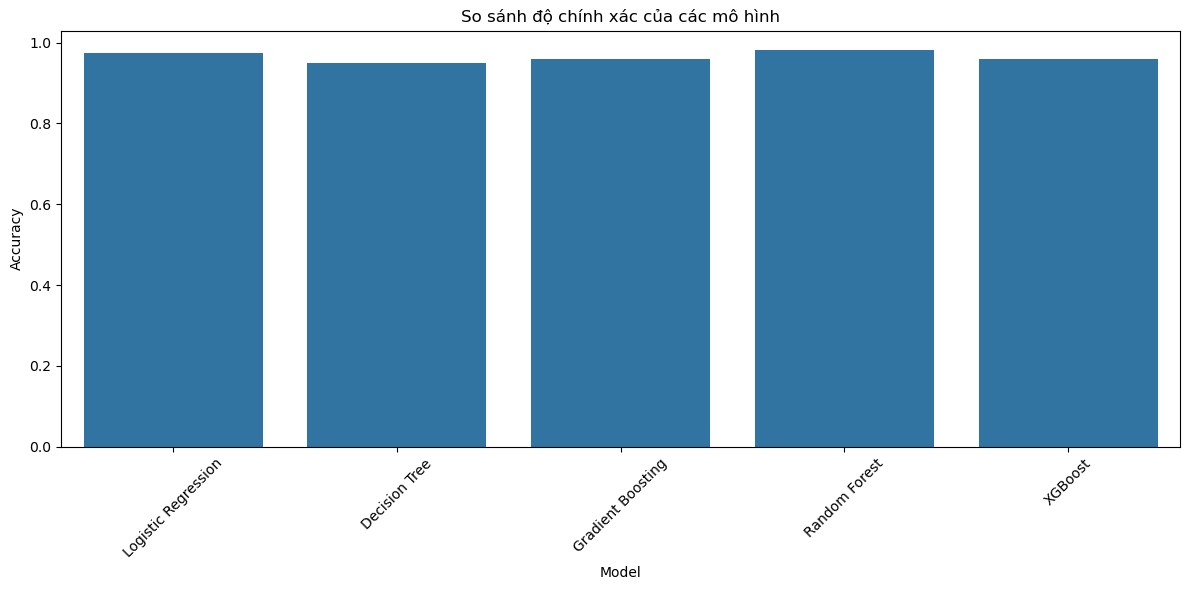

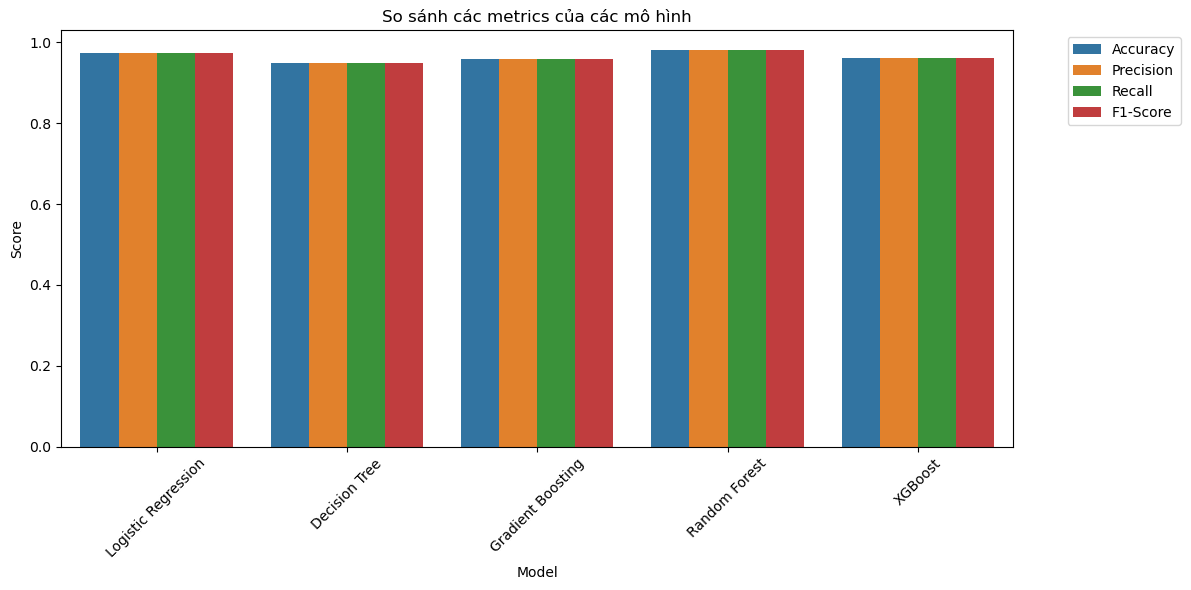

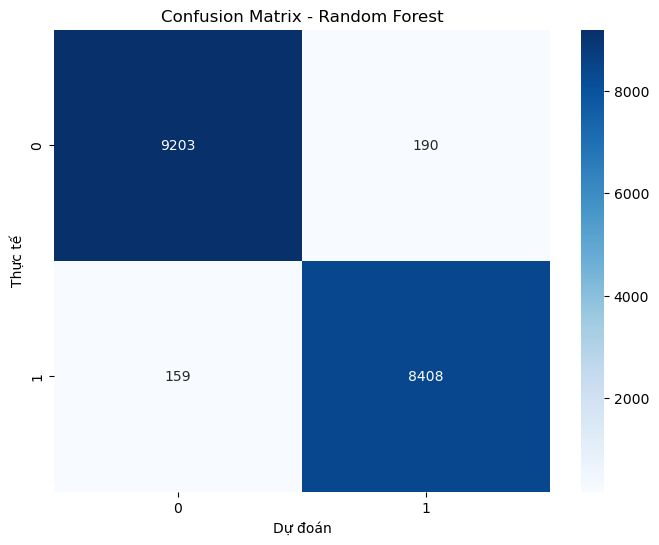

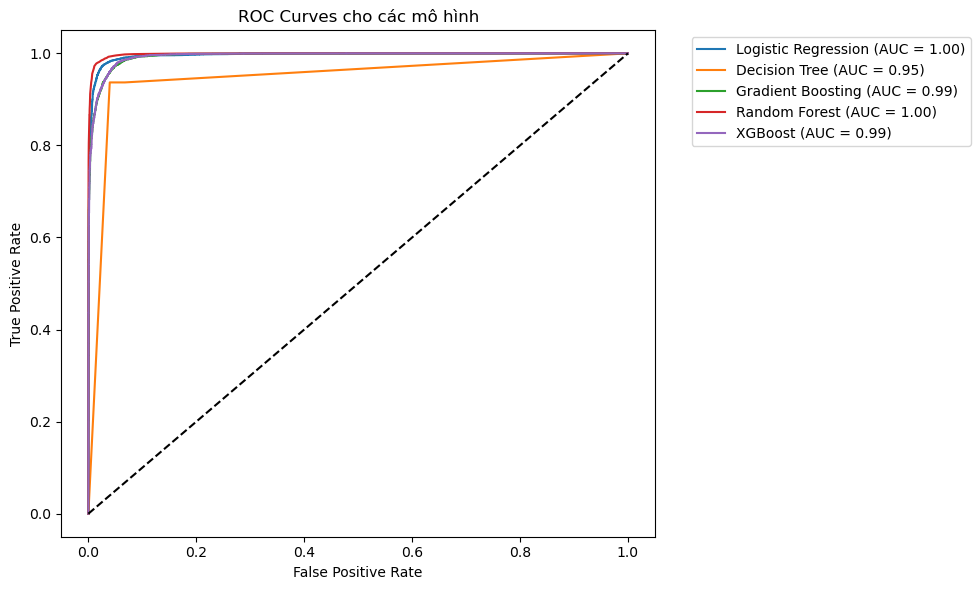


Bảng so sánh chi tiết các mô hình:
              Model  Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.9734     0.9732  0.9735    0.9733
      Decision Tree    0.9492     0.9496  0.9486    0.9490
  Gradient Boosting    0.9596     0.9594  0.9596    0.9595
      Random Forest    0.9806     0.9805  0.9806    0.9805
            XGBoost    0.9602     0.9601  0.9602    0.9602


In [53]:
# So sánh các mô hình
models = {
    'Logistic Regression': (LR, pred_lr),
    'Decision Tree': (DT, pred_dt),
    'Gradient Boosting': (GBC, pred_gbc),
    'Random Forest': (RFC, pred_rfc),
    'XGBoost': (XG, pred_xg)
}

# Tính toán các metrics cho từng mô hình
results = []
for name, (model, predictions) in models.items():
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score']
    })

results_df = pd.DataFrame(results)

# 1. So sánh accuracy của các mô hình
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy')
plt.title('So sánh độ chính xác của các mô hình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. So sánh các metrics khác nhau
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(12, 6))
results_df_melted = results_df.melt(id_vars=['Model'], value_vars=metrics, var_name='Metric', value_name='Score')
sns.barplot(data=results_df_melted, x='Model', y='Score', hue='Metric')
plt.title('So sánh các metrics của các mô hình')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Vẽ Confusion Matrix cho Random Forest (mô hình tốt nhất)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, pred_rfc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

# 4. So sánh ROC curves
plt.figure(figsize=(10, 6))
for name, (model, predictions) in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(xv_test_with_length)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves cho các mô hình')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# In bảng so sánh chi tiết
print("\nBảng so sánh chi tiết các mô hình:")
print(results_df.round(4).to_string(index=False))